In [1]:
import pandas as pn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
raw_data = pn.read_csv('Argentina/Data/Crust.xyz', sep='\t', header=None)

In [3]:
raw_data = raw_data.iloc[::4]

In [4]:
from scipy.spatial import Delaunay
tri = Delaunay(raw_data.iloc[:,:2])

In [5]:
tri.simplices.shape

(2448, 3)

In [6]:
%matplotlib qt5
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(raw_data.values[:,0], raw_data.values[:,1], raw_data.values[:,2], c=raw_data.values[:,2], cmap='viridis',)

In [7]:
import vtk
vertices = raw_data
simplices = tri.simplices


# setup points and vertices
Points = vtk.vtkPoints()
Triangles = vtk.vtkCellArray()
Triangle = vtk.vtkTriangle()
for p in vertices.values:
    Points.InsertNextPoint(p)

# Unfortunately in this simple example the following lines are ambiguous.
# The first 0 is the index of the triangle vertex which is ALWAYS 0-2.
# The second 0 is the index into the point (geometry) array, so this can range from 0-(NumPoints-1)
# i.e. a more general statement is triangle->GetPointIds()->SetId(0, PointId);
for i in simplices:
    Triangle.GetPointIds().SetId(0, i[0])
    Triangle.GetPointIds().SetId(1, i[1])
    Triangle.GetPointIds().SetId(2, i[2])

    Triangles.InsertNextCell(Triangle)

polydata = vtk.vtkPolyData()
polydata.SetPoints(Points)
polydata.SetPolys(Triangles)

polydata.Modified()
if vtk.VTK_MAJOR_VERSION <= 5:
    polydata.Update()


In [8]:
from vtk import (vtkSphereSource, vtkPolyData, vtkDecimatePro)
inputPoly = vtkPolyData()
inputPoly.ShallowCopy(polydata)

print("Before decimation\n"
      "-----------------\n"
      "There are " + str(inputPoly.GetNumberOfPoints()) + "points.\n"
      "There are " + str(inputPoly.GetNumberOfPolys()) + "polygons.\n")

decimate = vtkDecimatePro()
decimate.SetInputData(inputPoly)
#decimate.SetTargetReduction(.80)
decimate.SetMaximumError(.055)
decimate.Update()

decimatedPoly = vtkPolyData()
decimatedPoly.ShallowCopy(decimate.GetOutput())

print("After decimation \n"
      "-----------------\n"
      "There are " + str(decimatedPoly.GetNumberOfPoints()) + "points.\n"
      "There are " + str(decimatedPoly.GetNumberOfPolys()) + "polygons.\n")



Before decimation
-----------------
There are 1260points.
There are 2448polygons.

After decimation 
-----------------
There are 138points.
There are 243polygons.



In [9]:
import numpy as np

for i in range(decimatedPoly.GetNumberOfPoints()):
    if i is 0:
        final_points = np.array(decimatedPoly.GetPoint(i))
    else:
        final_points = np.vstack((final_points, decimatedPoly.GetPoint(i)))

In [10]:
final_points.shape

(138, 3)

In [11]:
if False:

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    ax.scatter(raw_data.values[:,0], raw_data.values[:,1], raw_data.values[:,2], c=raw_data.values[:,2], cmap='inferno', alpha=0.5, s=.5)
    ax.scatter(final_points[:,0], final_points[:,1], final_points[:,2], c=final_points[:,2], cmap='viridis', s=50)

In [13]:
final_points.mean(axis=0), final_points.min(axis=0)

(array([  4.88043478e+05,   7.21413043e+06,  -1.17648965e+02]),
 array([ -250000.        ,  6000000.        ,    -6353.87939453]))

In [14]:
# Importing the data from CSV-files and setting extent and resolution
geo_data = gp.create_data([-250000,1.45000000e+06,6000000.,7.80000000e+06,-6353.87939453*100,4.34525244e+03*100],[50,50,50])

In [15]:
input_points = pn.DataFrame(final_points, columns=['X', 'Y', 'Z'])
input_points['formation'] = 'basement'
input_points['X_std'] = 0
input_points['Y_std'] = 0
input_points['Z_std'] = 0

In [16]:
gp.set_interfaces(geo_data, input_points)
#geo_data.interfaces['Z'] *= 10e1

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp
import pandas as pn

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as pltmodeling

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading data

In [2]:
geo_data = gp.read_pickle("geo_data.pickle")

In [3]:
geo_data.extent[-2] = -10000
geo_data.extent[-1] = 2000
# geo_data.interfaces['Z'] *= 100

In [4]:
geo_data.extent

array([ -2.50000000e+05,   1.45000000e+06,   6.00000000e+06,
         7.80000000e+06,  -1.00000000e+04,   2.00000000e+03])

In [5]:
geo_data.interfaces['X_std'] = 0
geo_data.interfaces['Y_std'] = 0
geo_data.interfaces['Z_std'] = 0

In [6]:
#geo_data.add_orientation(X = -2.88043478e+04, Y =  6.21413043e+06, Z = -1.17648965e+02, dip=0, azimuth=0, polarity=1, formation='Default' )
input_orientation = pn.DataFrame([[4.88043478e+05,   7.21413043e+06,  -1.17648965e+02, 0.01,0.01,1]], columns=['X', 'Y', 'Z', 'dip', 'azimuth', 'polarity'])
input_orientation['formation'] = 'Default'
input_orientation['X_std'] = 0
input_orientation['Y_std'] = 0
input_orientation['Z_std'] = 0
gp.set_orientations(geo_data, input_orientation, append=False)

In [25]:
geo_data.interfaces['formation'].iloc[[20,21,22]] = 'selected_points'

In [34]:
gp.set_orientation_from_interfaces(geo_data, [20,21,22])

In [35]:
geo_data.interfaces.iloc[[20,21,22]]

,X,Y,Z,formation,series,order_series,isFault,formation number,annotations
20,455505.508301,6075000.0,-709244.096246,Default,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},20}$"
21,650000.000000,6075000.0,-20695.614624,Default,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},21}$"
22,625000.000000,6175000.0,-22427.435303,Default,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},22}$"


In [11]:
%matplotlib qt5
gp.plot_data(geo_data, direction='y')

In [12]:
gp.plot_data_3D(geo_data)

In [7]:
ori = geo_data.create_orientation_from_interfaces([3])
ori

UnboundLocalError: local variable 'dip_direction' referenced before assignment

In [6]:
%debug

> /home/miguel/PycharmProjects/gempy/gempy/data_management.py(252)get_orientation()
    250             dip_direction = 360 + np.arctan(normal[0] / normal[1]) / np.pi * 180.
    251 
--> 252         azimuth = dip_direction
    253 
    254         if -90 < dip < 90:

*** NameError: name 'dip_direction' is not defined
array([ 0.,  0.,  1.])


In [ ]:
geo_data.interfaces['formation'].iloc[[3,4,5]].unique().shape[0]

In [ ]:
geo_data.add_orientation(X=ori[0], Y=ori[1], Z=ori[2],
                         dip=ori[3], azimuth=ori[4], polarity=ori[5],
                         G_x=ori[6], G_y=ori[7], G_z=ori[8])

In [47]:
geo_data.orientations

,X,Y,Z,dip,azimuth,polarity,formation,X_std,Y_std,Z_std,series,order_series,isFault,formation number,annotations,G_x,G_y,G_z
0,488043.478,7214130.43,-117.648965,0.01,0.01,1,Default,0,0,0,Default serie,1,False,1,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1.304617e-07,0.000175,1.0


In [ ]:
geo_data.orientations

In [ ]:
input_orientation['formation'] = 'basement'
input_orientation['X_std'] = 0
input_orientation['Y_std'] = 0
input_orientation['Z_std'] = 0

In [ ]:
geo_data.add_orientation(X = -2.88043478e+04, Y =  6.21413043e+06, Z = -1.17648965e+02, dip=0, azimuth=0, polarity=1, formation='basement' )
geo_data.add_orientation(X = -1.88043478e+02, Y =  6.01413043e+06, Z = -1.17648965e+04, dip=0, azimuth=0, polarity=1, formation='basement' )
geo_data.add_orientation(X = 12.88043478e+05, Y =  7.01413043e+06, Z = -1.17648965e+02, dip=0, azimuth=0, polarity=1, formation='basement' )

In [58]:
geo_data.orientations

,X,Y,Z,dip,azimuth,polarity,formation,X_std,Y_std,Z_std,series,order_series,isFault,formation number,annotations,G_x,G_y,G_z
0,488043.478,7214130.43,-117.648965,0.0,0.0,1,Default,0,0,0,Default serie,1,False,1,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1.304617e-07,0.000175,1.0


In [57]:
geo_data.calculate_orientations()

In [7]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True, u_grade=[1], dtype='float64')

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


In [7]:
interp_data.update_interpolator(geo_data)

In [8]:
lith, fault = gp.compute_model(interp_data)

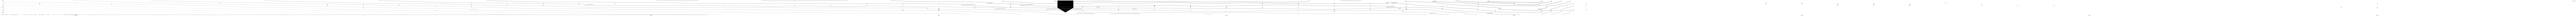

In [51]:
gp.plot_scalar_field(geo_data, lith[1], 25)

In [57]:
%matplotlib qt5
gp.plot_section(geo_data, lith[0],25, plot_data= True)

In [9]:
ver, sim = gp.get_surfaces(interp_data, lith[1], None, original_scale=False)

In [10]:
gp.plot_surfaces_3D_real_time(interp_data, ver, sim)

[0.26081428571428567 0.7465285714285714 0.24295714285714287
 0.7572428571428571 4.982584235491071 5.016869949776785]
